In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
fi = np.load("../16000MeV_10Perc_SB_150_Apr_27_preds_DATA.npz")

for i in fi.keys():
    print(i)

preds_data
preds_gen


In [67]:
preds_gen = fi['preds_gen']

In [68]:
ws = np.load("/data0/users/wmccorma/Apr_2021_Omni_NOsynthsig_125_pythia/Official_NOsynthsig_10Perc_perc_5_mass_Pythia_omnifold.npy")

In [69]:
itnum = 6
denom = np.sum(ws[itnum])/200000.

In [70]:
preds_data = fi['preds_data']

In [71]:
print(np.average(preds_data[:20000,1]))

0.73499465


In [72]:
print(np.zeros(10))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [73]:
cuts = []
for i in range(10):
    cuts.append(.5+0.05*float(i))

In [74]:
print(cuts)

[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.8500000000000001, 0.9, 0.95]


In [75]:
num_data = np.zeros(10)
num_true = np.zeros(10)
for c in range(len(cuts)):
    for e in range(len(preds_data)):
        if(preds_data[e][1] > cuts[c]):
            num_data[c]+=1.
            if(e < 20000):
                num_true[c] += 1.
print(num_data)
print(num_true)

[62832. 54687. 45396. 35085. 24882. 16366. 10477.  6339.  3388.  1115.]
[18860. 18040. 16752. 14747. 12237.  9434.  6937.  4702.  2764.   966.]


In [76]:
print(len(preds_gen))

200000


In [77]:
num_gen = np.zeros(10)
num_weighted = np.zeros(10)

itnum = 10
denom = np.sum(ws[itnum])/200000.

for c in range(len(cuts)):
    for e in range(len(preds_gen)):
        if(preds_gen[e][1] > cuts[c]):
            num_gen[c]+=1.
            num_weighted[c]+=ws[itnum][e]/denom

print(num_gen)
print(num_weighted)

[44029. 36246. 28042. 19535. 11785.  6239.  3013.  1395.   510.   118.]
[49889.40324819 41744.28029019 33056.98226366 24044.04572589
 15726.35771688  9628.2788145   5959.06744323  4143.14956067
   511.73442876   113.24460303]


In [78]:
import matplotlib.pyplot as plt
import OmniFold.modplot as modplot

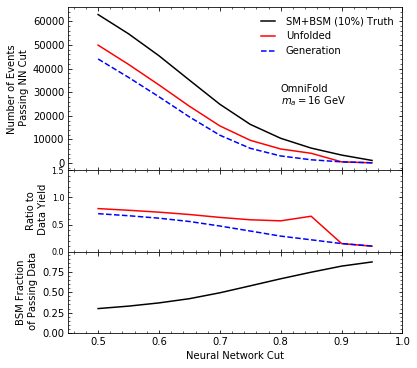

In [79]:
gridspec_kw = {'height_ratios': (3.5, 1.75, 1.75), 'hspace': 0.0}
figsize=(6,6)
fig, [ax0, ax1, ax2] = plt.subplots(3,  gridspec_kw=gridspec_kw, figsize=figsize)
ax0.minorticks_on()
ax0.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')
ax1.minorticks_on()
ax1.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')
ax2.minorticks_on()
ax2.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')

xlim = [0.45, 1.0]
ax0.set_xlim(xlim)
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)

#ax0.set_xlim(xlim)
ax1.set_ylim([.0,1.5])
ax2.set_ylim([0.0,.99])

ax2.set_xlabel('Neural Network Cut')

ax0.set_ylabel('Number of Events\n Passing NN Cut')
ax1.set_ylabel('Ratio to\n Data Yield')
ax2.set_ylabel('BSM Fraction\n of Passing Data')

ax0.tick_params(labelbottom=False)
ax1.tick_params(labelbottom=False)
ax1.tick_params(axis='y', labelsize=8)

ax0.plot(cuts, num_data, label='SM+BSM (10%) Truth', color = 'black')
ax0.plot(cuts, num_weighted, label='Unfolded', color = 'red')
ax0.plot(cuts, num_gen, label='Generation', color = 'blue', ls = 'dashed')

ax1.plot(cuts, num_weighted/num_data, color = 'red')
ax1.plot(cuts, num_gen/num_data, color = 'blue', ls = 'dashed')

ax2.plot(cuts, num_true/num_data, color = 'black')

legend_opts = {'handlelength': 2.0, 'loc': 'upper right', 'frameon': False, 'numpoints': 2}
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles, labels, **legend_opts)

ax0.text(0.8, 30000, 'OmniFold')
ax0.text(.8, 25000, '$m_{a} = 16$ GeV')
plt.savefig('NN_cut_omni_16GeV_10perc.pdf', bbox_inches = "tight")

In [87]:
cuts = []
for i in range(10):
    cuts.append(.8+0.02*float(i))

In [88]:
print(cuts)

[0.8, 0.8200000000000001, 0.8400000000000001, 0.8600000000000001, 0.88, 0.9, 0.92, 0.9400000000000001, 0.9600000000000001, 0.98]


In [89]:
fi = np.load("../16000MeV_0Perc_SB_150_Apr_27_preds_DATA.npz")
preds_gen = fi['preds_gen']
preds_data = fi['preds_data']
ws = np.load("/data0/users/wmccorma/Apr_2021_Omni_NOsynthsig_125_pythia/Official_NOsynthsig_0Perc_perc_5_mass_Pythia_omnifold.npy")

In [100]:
print(len(preds_gen))
print(len(preds_data))
print(np.average(preds_gen[:,1]))
print(np.average(preds_data[:,1]))
print(preds_gen[:,1])

200000
200000
0.26207876
0.27845466
[0.20862164 0.2596742  0.09081695 ... 0.5736225  0.49626294 0.10552842]


In [83]:
num_data = np.zeros(10)
num_true = np.zeros(10)
for c in range(len(cuts)):
    for e in range(len(preds_data)):
        if(preds_data[e][1] > cuts[c]):
            num_data[c]+=1.
            if(e < 200):
                num_true[c] += 1.
print(num_data)
print(num_true)

[3988. 2991. 2196. 1534. 1041.  708.  439.  255.  103.   33.]
[68. 64. 52. 43. 35. 29. 22. 14. 10.  3.]


In [84]:
num_gen = np.zeros(10)
num_weighted = np.zeros(10)

itnum = 10
denom = np.sum(ws[itnum])/200000.

for c in range(len(cuts)):
    for e in range(len(preds_gen)):
        if(preds_gen[e][1] > cuts[c]):
            num_gen[c]+=1.
            num_weighted[c]+=ws[itnum][e]/denom

print(num_gen)
print(num_weighted)

[3013. 2232. 1631. 1152.  790.  510.  316.  162.   78.   24.]
[3008.05896927 2230.4259177  1629.8554822  1152.85704999  791.0526223
  512.25004589  317.68983567  162.60743621   78.68291993   24.09466244]


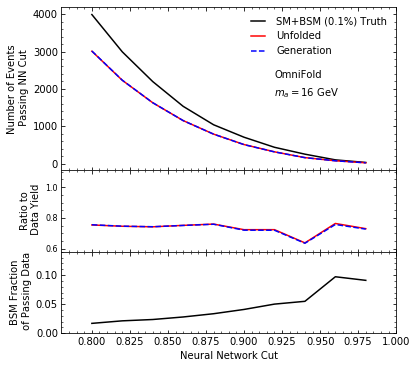

In [85]:
gridspec_kw = {'height_ratios': (3.5, 1.75, 1.75), 'hspace': 0.0}
figsize=(6,6)
fig, [ax0, ax1, ax2] = plt.subplots(3,  gridspec_kw=gridspec_kw, figsize=figsize)
ax0.minorticks_on()
ax0.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')
ax1.minorticks_on()
ax1.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')
ax2.minorticks_on()
ax2.tick_params(top=True, right=True, bottom=True, left=True, direction='in', which='both')

xlim = [0.78, 1.0]
ax0.set_xlim(xlim)
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)

#ax0.set_xlim(xlim)
ax1.set_ylim([.58,1.11])
ax2.set_ylim([0.0,.14])

ax2.set_xlabel('Neural Network Cut')

ax0.set_ylabel('Number of Events\n Passing NN Cut')
ax1.set_ylabel('Ratio to\n Data Yield')
ax2.set_ylabel('BSM Fraction\n of Passing Data')

ax0.tick_params(labelbottom=False)
ax1.tick_params(labelbottom=False)
ax1.tick_params(axis='y', labelsize=8)

ax0.plot(cuts, num_data, label='SM+BSM (0.1%) Truth', color = 'black')
ax0.plot(cuts, num_weighted, label='Unfolded', color = 'red')
ax0.plot(cuts, num_gen, label='Generation', color = 'blue', ls = 'dashed')
#ax0.set_yscale('log')

ax1.plot(cuts, num_weighted/num_data, color = 'red')
ax1.plot(cuts, num_gen/num_data, color = 'blue', ls = 'dashed')

ax2.plot(cuts, num_true/num_data, color = 'black')

legend_opts = {'handlelength': 2.0, 'loc': 'upper right', 'frameon': False, 'numpoints': 2}
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles, labels, **legend_opts)

ax0.text(0.92, 2300, 'OmniFold')
ax0.text(0.92, 1800, '$m_{a} = 16$ GeV')
plt.savefig('NN_cut_omni_16GeV_0perc.pdf', bbox_inches = "tight")